In [1]:
import pandas as pd
import numpy as np

In [2]:
sp500_quotes = pd.read_csv('sp500_quotes_clean_v1.csv')

In [3]:
sp500_quotes

,Unnamed: 0,date,open_price,close_price,volume,symbol
0,32,2016-04-01,39.56,40.31,2857844,A
1,33,2016-04-04,40.33,40.01,2958061,A
2,34,2016-04-05,39.73,39.26,1900659,A
3,35,2016-04-06,39.17,40.24,1566612,A
4,36,2016-04-07,39.70,39.47,1373839,A
...,...,...,...,...,...,...
598296,7794326,2020-12-24,159.92,160.72,417444,ZTS
598297,7794327,2020-12-28,161.44,162.39,1522435,ZTS
598298,7794328,2020-12-29,163.21,163.12,1188357,ZTS
598299,7794329,2020-12-30,163.51,164.27,1008988,ZTS


In [4]:
sp500_quotes=sp500_quotes.drop(['Unnamed: 0'], axis=1)

In [5]:
def year_quarter (date):
    quarter=''
    year,month,day=date.split('-')
    if month in ['01', '02', '03']:
        quarter='1'
    elif month in ['04', '05', '06']:
        quarter='2'
    elif month in ['07', '08', '09']:
        quarter='3'
    else:
        quarter='4'
    return year+'Q'+quarter

In [6]:
sp500_quotes['period']=sp500_quotes['date'].apply(lambda x :year_quarter(x))

In [7]:
sp500_quotes['period'].unique()

array(['2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
       '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1',
       '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3',
       '2020Q4'], dtype=object)

In [8]:
periods=sp500_quotes['period'].unique().tolist()

In [9]:
symbols=sp500_quotes['symbol'].unique().tolist()

In [10]:
sp500_companies= pd.read_csv('sp500_companies.csv')

In [11]:
sp500_companies = sp500_companies.drop(['SUB-INDUSTRY'], axis=1)
cols = []
for i in range(len(sp500_companies.columns)):
    cols.append(sp500_companies.columns[i].lower())
sp500_companies.columns = cols

In [12]:
data=sp500_companies.copy()

In [13]:
missing_companies=['BBWI', 'BF.B', 'BRK.B', 'CTRA', 'OGN', 'WTW']
data=data[~data['symbol'].isin(['BBWI', 'BF.B', 'BRK.B', 'CTRA', 'OGN', 'WTW'])]
data=data.reset_index(drop=True)
data

,symbol,company,sector
0,A,Agilent Technologies,Health Care
1,AAL,American Airlines Group,Industrials
2,AAP,Advance Auto Parts,Consumer Discretionary
3,AAPL,Apple,Information Technology
4,ABBV,AbbVie,Health Care
...,...,...,...
494,YUM,Yum! Brands,Consumer Discretionary
495,ZBH,Zimmer Biomet,Health Care
496,ZBRA,Zebra Technologies,Information Technology
497,ZION,Zions Bancorp,Financials


In [14]:
cont=0
for per in range(len(periods)):
    cont+=1
    print(cont)
    period_volume_shares=[]
    period_volume_change=[]
    period_volume_dollars=[]
    period_volume_dollars_change=[]
    period_price_change=[]
    col_weight=periods[per]+'_weight'
    col_vol_shares=periods[per]+'_vol_shares'
    col_vol_shares_change=periods[per]+'_vol_shares_change'
    col_vol_dollars=periods[per]+'_vol_$'
    col_vol_change=periods[per]+'_vol_$_change'
    col_price_change=periods[per]+'_price_change'
    for symbol in symbols:
        data_temp=sp500_quotes[(sp500_quotes['symbol']==symbol) & (sp500_quotes['period']==periods[per])]
        data_temp['money']=data_temp['volume']*(data_temp['open_price']+data_temp['close_price'])/2
        volume_shares=data_temp['volume'].sum()
        volume_dollars=data_temp['money'].sum()
        open_period=data_temp[data_temp['date']==data_temp['date'].min()]['open_price']
        close_period=data_temp[data_temp['date']==data_temp['date'].max()]['close_price']
        price_change=round(100*(list(close_period)[0]-list(open_period)[0])/list(open_period)[0], 3)
        period_volume_shares.append(volume_shares)
        period_volume_dollars.append(volume_dollars)
        period_price_change.append(price_change)
    data[col_weight]= period_volume_dollars/sum(period_volume_dollars)
    data[col_vol_shares]=period_volume_shares
    if cont>1:
        col_prev_volume_shares=periods[per-1]+'_vol_shares'
        data[col_vol_shares_change]=round(100*(data[col_vol_shares]-data[col_prev_volume_shares])/data[col_prev_volume_shares],3)
    data[col_vol_dollars]=period_volume_dollars
    if cont>1:
        col_prev_volume_dollars=periods[per-1]+'_vol_$'
        data[col_vol_change]=round(100*(data[col_vol_dollars]-data[col_prev_volume_dollars])/data[col_prev_volume_dollars],3)
    data[col_price_change]=period_price_change

1


C:\Users\Usuario\AppData\Local\Temp/ipykernel_5104/969954688.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp['money']=data_temp['volume']*(data_temp['open_price']+data_temp['close_price'])/2


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


C:\Users\Usuario\AppData\Local\Temp/ipykernel_5104/969954688.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col_price_change]=period_price_change


18


C:\Users\Usuario\AppData\Local\Temp/ipykernel_5104/969954688.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col_weight]= period_volume_dollars/sum(period_volume_dollars)
C:\Users\Usuario\AppData\Local\Temp/ipykernel_5104/969954688.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col_vol_shares]=period_volume_shares
C:\Users\Usuario\AppData\Local\Temp/ipykernel_5104/969954688.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

19


In [15]:
data

,symbol,company,sector,2016Q2_weight,2016Q2_vol_shares,2016Q2_vol_$,2016Q2_price_change,2016Q3_weight,2016Q3_vol_shares,2016Q3_vol_shares_change,...,2020Q3_vol_shares_change,2020Q3_vol_$,2020Q3_vol_$_change,2020Q3_price_change,2020Q4_weight,2020Q4_vol_shares,2020Q4_vol_shares_change,2020Q4_vol_$,2020Q4_vol_$_change,2020Q4_price_change
0,A,Agilent Technologies,Health Care,0.000869,140281524,6.084121e+09,12.133,0.000830,118778364,-15.329,...,-32.749,8.392700e+09,-20.573,13.556,0.000780,98796117,13.565,1.106780e+10,31.874,16.429
1,AAL,American Airlines Group,Industrials,0.003246,685350162,2.272491e+10,-29.454,0.003095,591804177,-13.649,...,-30.518,5.472012e+10,-33.943,-8.828,0.004914,4911375699,13.454,6.975285e+10,27.472,26.667
2,AAP,Advance Auto Parts,Consumer Discretionary,0.001480,67952248,1.035643e+10,0.956,0.001575,65941792,-2.959,...,-20.187,7.863110e+09,-4.278,7.825,0.000626,57630158,10.837,8.879801e+09,12.930,2.572
3,AAPL,Apple,Information Technology,0.035973,10216634504,2.518075e+11,-12.116,0.036441,9144019672,-10.499,...,17.831,1.219853e+12,69.405,26.873,0.062169,7341985215,-33.118,8.825345e+11,-27.652,12.793
4,ABBV,AbbVie,Health Care,0.004862,558100261,3.403161e+10,9.420,0.004282,441785352,-20.841,...,-33.267,4.172285e+10,-28.522,-11.076,0.003482,516898371,16.413,4.942422e+10,18.458,21.527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,YUM,Yum! Brands,Consumer Discretionary,0.002157,263672978,1.510069e+10,2.522,0.002489,268424732,1.802,...,-41.037,9.463629e+09,-36.270,4.738,0.000724,100457103,-2.143,1.027632e+10,8.588,17.808
495,ZBH,Zimmer Biomet,Health Care,0.001776,106707042,1.242929e+10,13.012,0.001508,79198215,-25.780,...,-34.625,9.259358e+09,-25.869,13.639,0.000697,67987863,-2.176,9.894502e+09,6.859,12.360
496,ZBRA,Zebra Technologies,Information Technology,0.000410,51095977,2.867655e+09,-26.237,0.000337,37395790,-26.813,...,-24.314,5.146935e+09,-12.291,-1.564,0.000550,23037423,20.148,7.811480e+09,51.770,49.655
497,ZION,Zions Bancorp,Financials,0.000769,203548765,5.383679e+09,4.231,0.000842,199391931,-2.042,...,-46.380,3.319119e+09,-45.111,-13.882,0.000340,130829197,27.055,4.820585e+09,45.237,48.665


In [23]:
import math
data.replace([np.inf, - np.inf], np.nan, inplace = True)

In [26]:
data.isna().sum()

symbol                      0
company                     0
sector                      0
2016Q2_weight               0
2016Q2_vol_shares           0
                           ..
2020Q4_vol_shares           0
2020Q4_vol_shares_change    0
2020Q4_vol_$                0
2020Q4_vol_$_change         0
2020Q4_price_change         0
Length: 115, dtype: int64

In [25]:
for column in data.columns:
    data[column] = data[column].fillna(0)

In [ ]:
data.to_csv('sp500_by_company.csv')

In [1]:
import pandas as pd
import numpy as np

In [2]:
sp500_companies = pd.read_csv('sp500_by_company.csv')

In [3]:
sp500_by_sector = pd.DataFrame({'sector' : []})

In [4]:
sp500_by_sector['sector']=sp500_companies['sector'].unique().tolist()

In [5]:
sp500_by_sector

,sector
0,Health Care
1,Industrials
2,Consumer Discretionary
3,Information Technology
4,Consumer Staples
5,Utilities
6,Financials
7,Materials
8,Real Estate
9,Energy


In [6]:
periods=['2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
       '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1',
       '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3',
       '2020Q4']

In [7]:
# multiplying by weight
for per in range(1,len(periods)):
    sector_weight=[]
    money_change=[]
    price_change=[]
    col_weight=periods[per]+'_weight'
    col_vol_change=periods[per]+'_vol_$_change'
    col_vol_change_new=periods[per]+'_vol_change'
    col_price_change=periods[per]+'_price_change'
    for sector in sp500_by_sector['sector']:
        sector_temp=sp500_companies[sp500_companies['sector']==sector]
        sector_weight.append(round(sum(sector_temp[col_weight]),4))
        money_change.append(round(sum(sector_temp[col_weight]*sector_temp[col_vol_change]),4))
        price_change.append(round(sum(sector_temp[col_weight]*sector_temp[col_price_change]),4))
    sp500_by_sector[col_weight]= sector_weight 
    sp500_by_sector[col_vol_change_new]=money_change
    sp500_by_sector[col_price_change]=price_change

In [8]:
# not multiplying by weight
for per in range(1,len(periods)):
    sector_weight=[]
    money_change=[]
    price_change=[]
    col_weight=periods[per]+'_weight'
    col_vol_change=periods[per]+'_vol_$_change'
    col_vol_change_new=periods[per]+'_vol_change'
    col_price_change=periods[per]+'_price_change'
    for sector in sp500_by_sector['sector']:
        sector_temp=sp500_companies[sp500_companies['sector']==sector]
    #    sector_weight.append(round(sum(sector_temp[col_weight]),4))
        money_change.append(round(sector_temp[col_vol_change].mean(),4))
        price_change.append(round(sector_temp[col_price_change].mean(),4))
   # sp500_sectors[col_weight]= sector_weight 
    sp500_by_sector[col_vol_change_new]=money_change
    sp500_by_sector[col_price_change]=price_change

In [8]:
sp500_by_sector

,sector,2016Q3_weight,2016Q3_vol_change,2016Q3_price_change,2016Q4_weight,2016Q4_vol_change,2016Q4_price_change,2017Q1_weight,2017Q1_vol_change,2017Q1_price_change,...,2020Q1_price_change,2020Q2_weight,2020Q2_vol_change,2020Q2_price_change,2020Q3_weight,2020Q3_vol_change,2020Q3_price_change,2020Q4_weight,2020Q4_vol_change,2020Q4_price_change
0,Health Care,0.1229,-0.1271,0.2375,0.1238,2.0215,-0.6598,0.1221,0.2293,1.0837,...,-1.1372,0.1075,1.4173,2.6820,0.0819,-1.3292,0.4267,0.1013,2.4944,1.2315
1,Industrials,0.1062,15.8936,0.5785,0.1035,1.5836,0.9896,0.1060,0.7172,0.4738,...,-2.9711,0.1221,8.1134,2.8247,0.0899,-1.4620,0.5015,0.0939,0.5400,1.8324
2,Consumer Discretionary,0.1419,-0.7597,0.6888,0.1390,1.7712,-0.1300,0.1387,0.4052,1.2670,...,-1.2900,0.1922,2.7273,11.9092,0.2676,22.3368,15.0498,0.2496,-1.8496,7.9471
3,Information Technology,0.1754,0.7882,2.7917,0.1750,3.1343,1.2888,0.1861,2.0802,2.4199,...,-3.0877,0.2364,-1.7307,8.6745,0.2766,8.4857,5.5181,0.2510,-2.0312,3.0791
4,Consumer Staples,0.0799,2.3926,-0.1737,0.0698,0.1734,-0.1603,0.0700,0.0757,0.3095,...,-0.6594,0.0473,-0.4217,0.5433,0.0396,-0.3767,0.3485,0.0410,0.1073,0.2220
5,Utilities,0.0318,-0.0627,-0.2307,0.0285,0.0506,-0.0157,0.0266,-0.1652,0.1787,...,-0.3947,0.0224,-0.4038,0.1525,0.0191,-0.1213,0.0608,0.0204,0.0935,0.1175
6,Financials,0.1122,-0.7877,1.0645,0.1395,5.9192,3.6637,0.1361,-0.2819,0.1086,...,-3.1050,0.0864,-0.2237,1.9113,0.0640,-1.3665,-0.0014,0.0727,0.9336,2.0010
7,Materials,0.0297,-0.1057,0.0770,0.0289,0.3377,0.2062,0.0299,0.1115,0.0714,...,-0.6669,0.0231,0.5170,0.7658,0.0190,-0.0697,0.2650,0.0214,0.2391,0.3834
8,Real Estate,0.0328,-0.0625,-0.1242,0.0310,0.2699,-0.0973,0.0299,-0.0019,0.0817,...,-0.4927,0.0258,0.1052,0.5051,0.0180,-0.4708,0.0066,0.0213,0.3285,0.1694
9,Energy,0.0604,-0.1123,0.3624,0.0537,0.0763,0.4549,0.0565,0.3212,-0.4459,...,-1.8593,0.0318,-0.1311,1.6523,0.0214,-0.6045,-0.4781,0.0263,0.5629,0.9138


In [32]:
#sp500_by_sector['2017Q2_vol_change'][3]=0
#sp500_by_sector['2017Q2_vol_change'][3]=sp500_by_sector['2017Q2_vol_change'].mean()

C:\Users\Usuario\AppData\Local\Temp/ipykernel_11380/1037167023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_by_sector['2017Q2_vol_change'][3]=0
C:\Users\Usuario\AppData\Local\Temp/ipykernel_11380/1037167023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_by_sector['2017Q2_vol_change'][3]=sp500_by_sector['2017Q2_vol_change'].mean()


In [9]:
sp500_by_sector.to_csv('sp500_by_sector.csv')

In [20]:
sp500_by_sector.to_excel('sp500_by_sector.xls')

C:\Users\Usuario\AppData\Local\Temp/ipykernel_11380/1458915932.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sp500_by_sector.to_excel('sp500_by_sector.xls')


In [10]:
sp500_by_sector = pd.read_csv('sp500_by_sector.csv')

In [11]:
sp500_by_sector=sp500_by_sector.drop(['Unnamed: 0'], axis=1)

In [12]:
companies_distribution=sp500_companies.groupby(['sector']).size().reset_index(name='counts')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

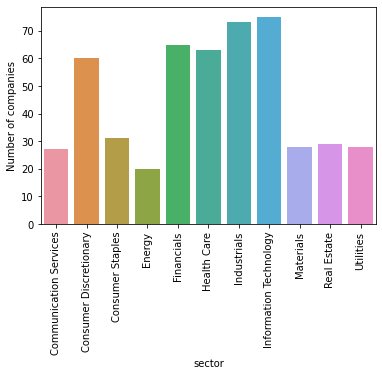

In [14]:
sns.barplot(x=companies_distribution['sector'], y=companies_distribution['counts'], data=sp500_companies)
plt.xticks(rotation='vertical')
plt.ylabel('Number of companies')
plt.show()

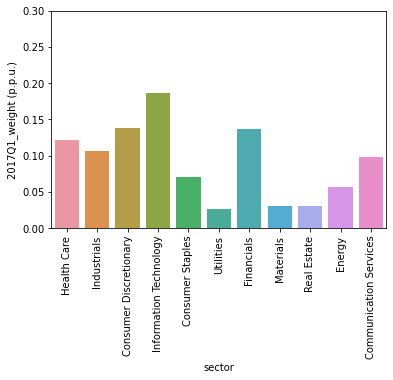

In [15]:
sns.barplot(x="sector", y="2017Q1_weight", data=sp500_by_sector)
plt.xticks(rotation='vertical')
ax = plt.gca()
plt.ylabel('2017Q1_weight (p.p.u.)')
ax.set_ylim([0, 0.3])
plt.show()

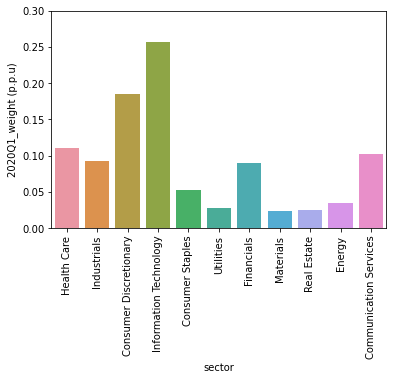

In [16]:
sns.barplot(x="sector", y="2020Q1_weight", data=sp500_by_sector)
plt.xticks(rotation='vertical')
ax = plt.gca()
plt.ylabel('2020Q1_weight (p.p.u)')
ax.set_ylim([0, 0.3])
plt.show()

In [17]:
index=2
corr=[]
period=[]
while index<(len(sp500_by_sector.columns)-4):
    period.append(sp500_by_sector.columns[index]+' - '+sp500_by_sector.columns[index+4])
    corr.append(sp500_by_sector[sp500_by_sector.columns[index]].corr(sp500_by_sector[sp500_by_sector.columns[index+4]]))
    index+=3

In [18]:
corr

[0.09422090017514775,
 0.35657987000950603,
 0.48104939264718455,
 0.9188393752347017,
 -0.049189222853375264,
 0.8119985764149674,
 0.7253477387643472,
 -0.31694502660657686,
 -0.8277803851546837,
 0.8316949572234618,
 -0.6088035300724706,
 -0.04972764882517147,
 0.2872385710536288,
 0.07821096795692803,
 0.9890469805852238,
 0.12305330597700388,
 0.9362622584435953]

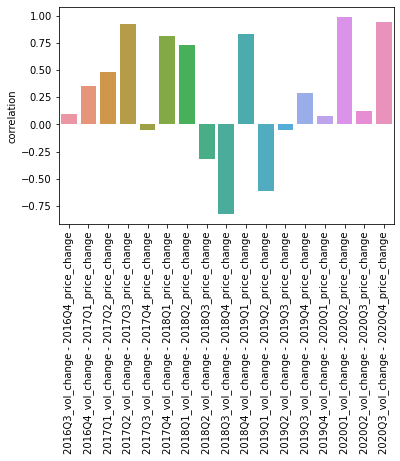

In [19]:
sns.barplot(x=period, y=corr, data=sp500_by_sector)
plt.xticks(rotation=90)
ax = plt.gca()
plt.ylabel('correlation')
plt.show()

C:\Users\Usuario\AppData\Local\Temp/ipykernel_11380/2833939416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_by_sector['2017Q2_vol_change'][3]=sp500_by_sector['2017Q2_vol_change'][3]-1023


In [26]:
sp500_by_sector['2017Q2_vol_change'][3]

0.88250000000005

In [56]:
dummy = pd.DataFrame({'2017Q1_vol_change' : [],
                        '2017Q2_vol_change' : [],
                     '2017Q3_vol_change' : [],
                     '2017Q4_vol_change' : [],
                     '2018Q1_price_change' : []})

In [57]:
dummy['2017Q1_vol_change']=sp500_by_sector['2017Q1_vol_change']
dummy['2017Q2_vol_change']=sp500_by_sector['2017Q2_vol_change']
dummy['2017Q3_vol_change']=sp500_by_sector['2017Q3_vol_change']
dummy['2017Q4_vol_change']=sp500_by_sector['2017Q4_vol_change']
dummy['2018Q1_price_change']=sp500_by_sector['2018Q1_price_change']

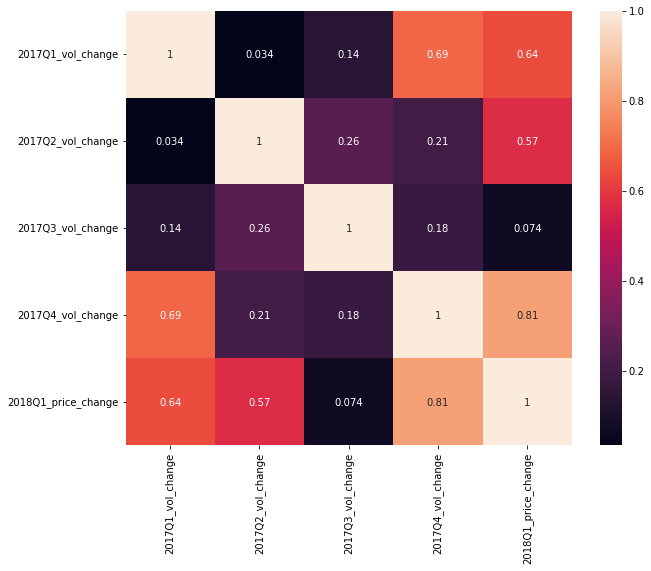

In [58]:
corr_matrix=dummy.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [59]:
y = dummy['2018Q1_price_change']
X = dummy.drop(['2018Q1_price_change'], axis=1)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
import math
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [62]:
lm = LinearRegression()
lm.fit(X_train,y_train)

from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.9212179352077208

In [35]:
dummy = pd.DataFrame({'2018Q1_vol_change' : [],
                        '2018Q2_vol_change' : [],
                     '2018Q3_vol_change' : [],
                     '2018Q4_vol_change' : [],
                     '2019Q1_price_change' : []})

In [36]:
dummy['2018Q1_vol_change']=sp500_by_sector['2018Q1_vol_change']
dummy['2018Q2_vol_change']=sp500_by_sector['2018Q2_vol_change']
dummy['2018Q3_vol_change']=sp500_by_sector['2018Q3_vol_change']
dummy['2018Q4_vol_change']=sp500_by_sector['2018Q4_vol_change']
dummy['2019Q1_price_change']=sp500_by_sector['2019Q1_price_change']

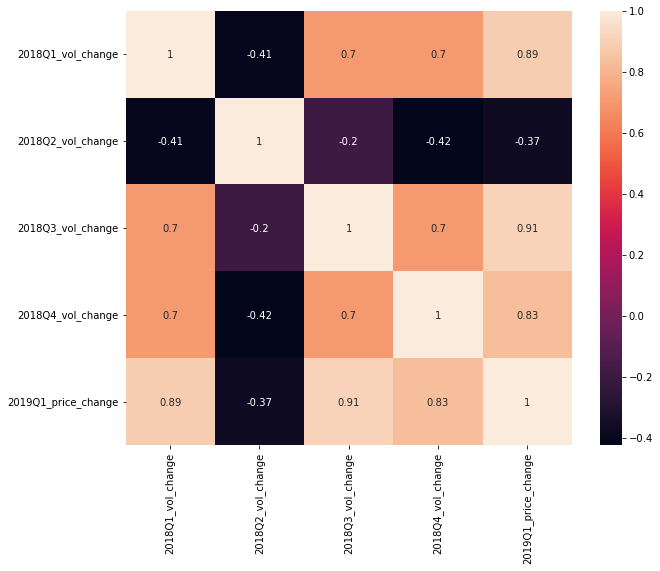

In [37]:
corr_matrix=dummy.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [39]:
y = dummy['2019Q1_price_change']
X = dummy.drop(['2019Q1_price_change'], axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
lm = LinearRegression()
lm.fit(X_train,y_train)

from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.9863294855861351

In [49]:
dummy = pd.DataFrame({'2019Q1_vol_change' : [],
                        '2019Q2_vol_change' : [],
                     '2019Q3_vol_change' : [],
                     '2019Q4_vol_change' : [],
                     '2020Q1_price_change' : []})

In [50]:
dummy['2019Q1_vol_change']=sp500_by_sector['2019Q1_vol_change']
dummy['2019Q2_vol_change']=sp500_by_sector['2019Q2_vol_change']
dummy['2019Q3_vol_change']=sp500_by_sector['2019Q3_vol_change']
dummy['2019Q4_vol_change']=sp500_by_sector['2019Q4_vol_change']
dummy['2020Q1_price_change']=sp500_by_sector['2020Q1_price_change']

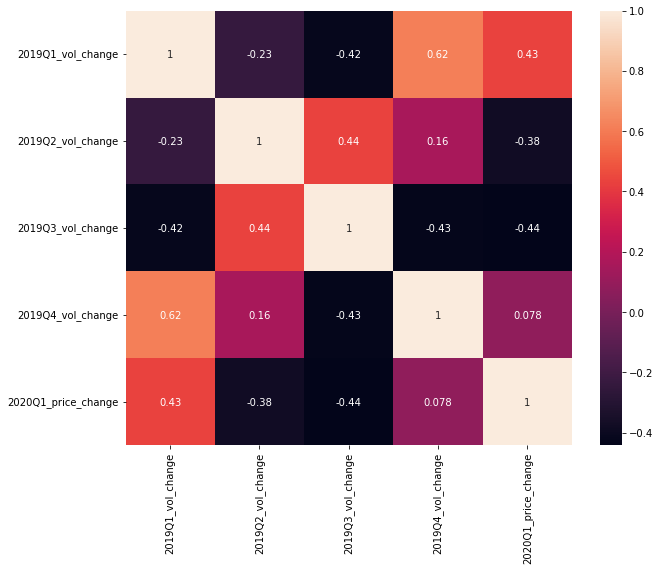

In [51]:
corr_matrix=dummy.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [52]:
y = dummy['2020Q1_price_change']
X = dummy.drop(['2020Q1_price_change'], axis=1)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
lm = LinearRegression()
lm.fit(X_train,y_train)

from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.49906781969396996